# Open CV

Welcome to this tutorial on OpenCV (Open Source Computer Vision Library)<br>
OpenCV is one of the most popular open-source libraries for computer vision, image processing, and machine learning. It provides a wide range of tools to work with images and videos, making it widely used in fields such as:
- Image and video processing and filtering
- Object detection and tracking
- Robotics and autonomous systems
- Machine learning and deep learning applications
- and more

Why OpenCV?
- Free and open-source
- Fast and optimized for real-time applications
- Large community and extensive documentation
- Works with Python, C++, and other languages

**Contact me:**  
- GitHub: [yasinpurraisi](https://github.com/yasinpurraisi)  
- Email: yasinpourraisi@gmail.com  
- Telegram: [yasinprsy](https://t.me/yasinprsy)


## Requirements
Before getting started, make sure the following Python libraries are installed

In [ ]:
!pip install opencv-python numpy matplotlib pillow


## Import libraries

In [1]:
# import Open CV library
import cv2

import matplotlib.pyplot as plt
import numpy as np

## Read and Display images

In [ ]:
# Load image
im = cv2.imread("images\Cat.jpg")

# Display image
cv2.imshow("Cat",im)

cv2.waitKey()
cv2.destroyAllWindows()

## type and shape

In [36]:
print(f"im type : {type(im)}")
print(f"im shape (height,width,channels) : {im.shape}")

im type : <class 'numpy.ndarray'>
im shape (height,width,channels) : (350, 280, 3)


## write image
- <code>JPG</code> : a lossy format that compresses images by discarding some details, resulting in smaller file sizes but lower fidelity. Best for photos and natural images where exact pixel accuracy isn’t critical.

- <code>PNG</code> : a lossless format that preserves every pixel exactly, often producing larger files. It supports transparency and is ideal for graphics, text, or images that require sharp detail.

In [37]:
# cv2.imwrite("output-name.outputformat", im)
cv2.imwrite("output_cat.jpg", im)
cv2.imwrite("output_cat.png", im)

True

## Matplotlib
in OpenCV images load as BGR(instead of RGB)

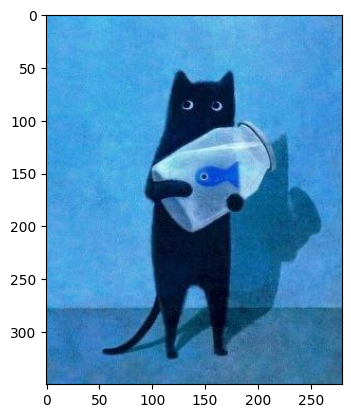

In [38]:
import matplotlib.pyplot as plt

plt.imshow(im)

convert image to RGB

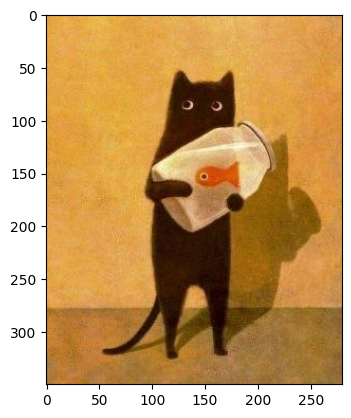

In [39]:
# cv2.cvtColor(input image,switch)
RGB_im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

plt.imshow(RGB_im)

read image in RGB

In [40]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)

## Changing pixel values

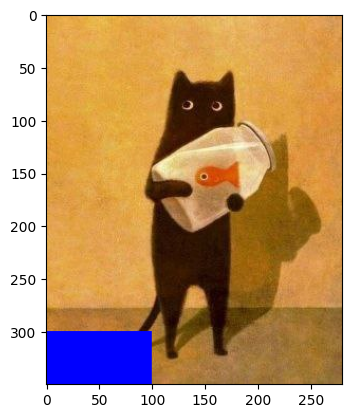

In [41]:
RGB_im[300:400,:100,:]= (0,0,255)

plt.imshow(RGB_im)

## Greyscale images

Greyscale image shape : (350, 280)


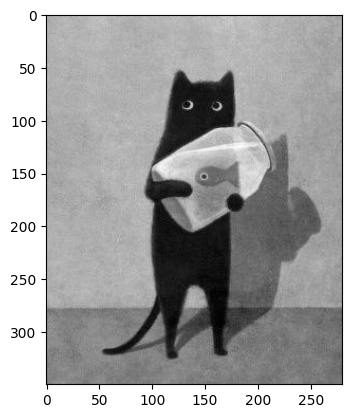

In [43]:
im = cv2.imread("images/Cat.jpg")
# convert to Greyscale
grey_im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

# read in Greyscale
grey_im1 = cv2.imread("images/Cat.jpg",cv2.IMREAD_GRAYSCALE)

# Greyscale shape : (height,width) and one channel (0-255)
print(f"Greyscale image shape : {grey_im.shape}")

#plot image
plt.imshow(grey_im1,cmap="gray")

## Cropping image

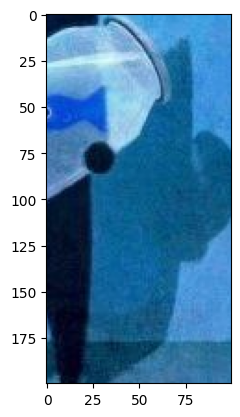

In [47]:
cropped_im = im[100:300,150:250]

plt.imshow(cropped_im)

## Color spaces
using the <code>split</code> the image seperates into 3 channels. each channel is just a ***2D array (height,width)*** of intensity values. When <code>merge</code>, they form the full ***3D color image(height,width,color channels)***.

(350, 280)

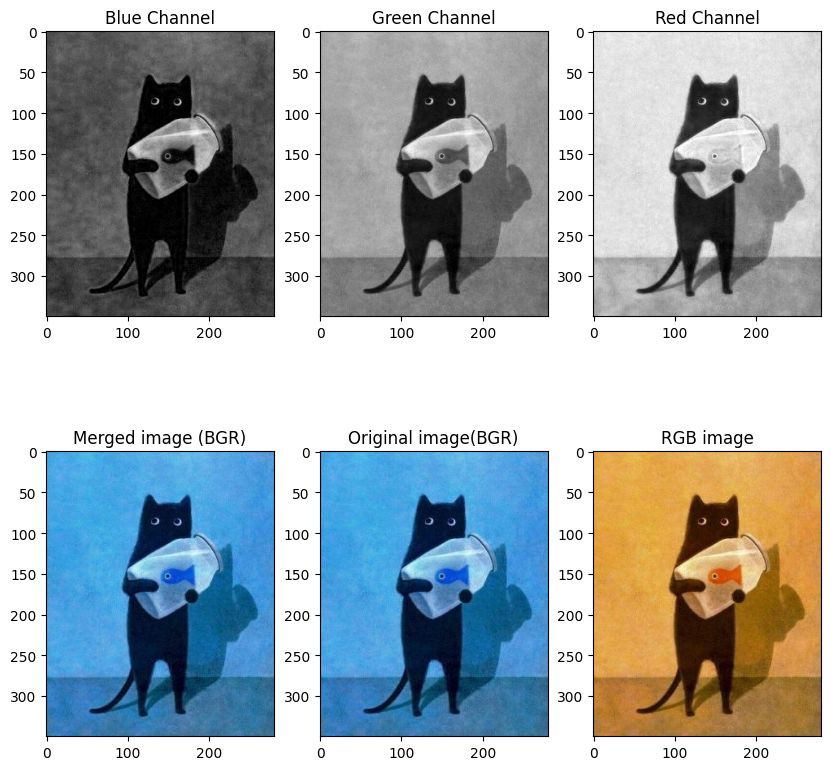

In [69]:
im = cv2.imread("images/Cat.jpg")
# Split
B,G,R = cv2.split(im)

# merge
merged_im = cv2.merge([B,G,R])

plt.figure(figsize=[10,10])
plt.subplot(231);plt.imshow(B,cmap='gray');plt.title("Blue Channel")
plt.subplot(232);plt.imshow(G,cmap='gray');plt.title("Green Channel")
plt.subplot(233);plt.imshow(R,cmap='gray');plt.title("Red Channel")
plt.subplot(234);plt.imshow(merged_im);plt.title("Merged image (BGR)")
plt.subplot(235);plt.imshow(im);plt.title("Original image(BGR)")
plt.subplot(236);plt.imshow(im[:,:,::-1]);plt.title("RGB image")
G.shape

## Copy() method
When assigning an image array directly using <code>Red = im</code>, the variable <code>Red</code> does not create an independent copy; instead, it references the same memory location as <code>im</code>. Consequently, any modifications applied to <code>Red</code> will also affect <code>im</code>. To prevent such unintended side effects, it is advisable to create an explicit duplicate of the array using the <code>copy()</code> method.

Text(0.5, 1.0, 'Original image')

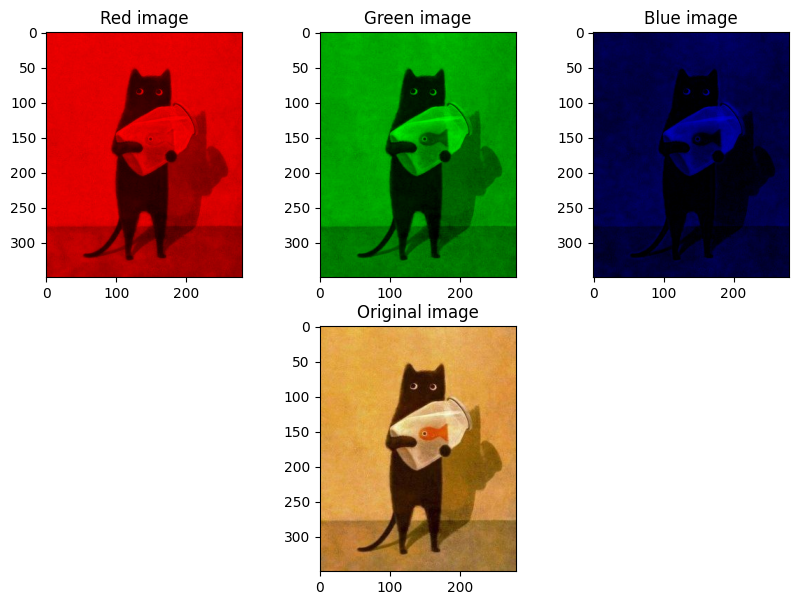

In [95]:
# Read image in RGB
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)

# Red
Red = im.copy()
Red[:,:,1]=0
Red[:,:,2]=0

# Green 
Green = im.copy()
Green[:,:,0]=0
Green[:,:,2]=0

# Blue
Blue = im.copy()
Blue[:,:,0]=0
Blue[:,:,1]=0

plt.figure(figsize=[10,7])
plt.subplot(231);plt.imshow(Red);plt.title("Red image")
plt.subplot(232);plt.imshow(Green);plt.title("Green image")
plt.subplot(233);plt.imshow(Blue);plt.title("Blue image")
plt.subplot(235);plt.imshow(im);plt.title("Original image")


## Changing values of color channels
In OpenCV, images are typically stored as NumPy arrays with the data type <code>uint8</code> (unsigned 8-bit integers). This means that each pixel value is represented within the range 0 to 255. When performing arithmetic operations on <code>uint8</code> arrays, NumPy applies modular (wrap-around) arithmetic: values greater than 255 loop back around starting from 0, and values below 0 wrap down from 255. For example, 250 + 20 would result in 14 instead of being capped at 255. To avoid this undesired overflow behavior, OpenCV provides functions like <code>cv2.add()</code>, which perform saturated arithmetic. In saturated arithmetic, values are clipped to remain within the valid range: anything above 255 is set to 255, and anything below 0 is set to 0. This ensures more predictable and visually correct results when adjusting image brightness or manipulating color channels.

Text(0.5, 1.0, 'Original image')

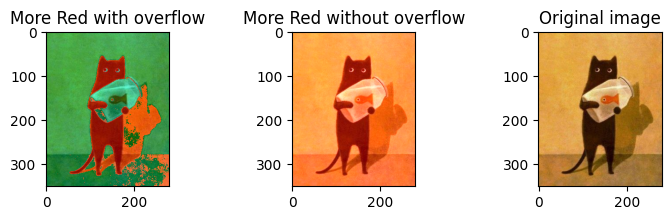

In [142]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)

R,G,B = cv2.split(im)
more_red_not_overflow = cv2.merge([cv2.add(R, 100),G,B])
more_red_overflow = cv2.merge([R+100,G,B])

plt.figure(figsize=[9,2])
plt.subplot(131);plt.imshow(more_red_overflow);plt.title("More Red with overflow")
plt.subplot(132);plt.imshow(more_red_not_overflow);plt.title("More Red without overflow")
plt.subplot(133);plt.imshow(im);plt.title("Original image")

## HSV

**HSV** stands for **Hue, Saturation, and Value**. It is an alternative way to represent colors that separates **color information** from **intensity**, which can be very useful in image processing tasks such as color detection and filtering.

Components of HSV:

1. **Hue (H):**  
   - Represents the **type of color** (e.g., red, green, blue).  
   - In OpenCV, hue ranges from **0 to 179** (instead of 0–360) due to 8-bit representation.  

2. **Saturation (S):**  
   - Indicates the **vividness or purity** of the color.  
   - Ranges from **0 (gray/pale)** to **255 (fully saturated)**.  

3. **Value (V):**  
   - Represents the **brightness** of the color.  
   - Ranges from **0 (black)** to **255 (full brightness)**.

(np.float64(-0.5), np.float64(279.5), np.float64(349.5), np.float64(-0.5))

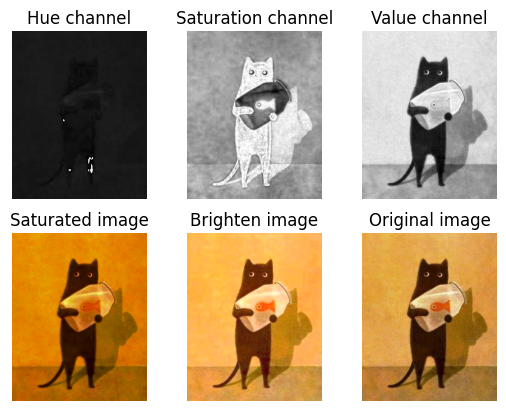

In [ ]:
im = cv2.imread("images/Cat.jpg")
hsv_im = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)

saturated_im = cv2.merge([hsv_im[:,:,0],cv2.add(hsv_im[:,:,1],100),hsv_im[:,:,2]])
brighten_im  = cv2.merge([hsv_im[:,:,0],hsv_im[:,:,1],cv2.add(hsv_im[:,:,2],50)])

plt.subplot(231);plt.imshow(hsv_im[:,:,0],cmap='gray');plt.title("Hue channel");plt.axis('off')
plt.subplot(232);plt.imshow(hsv_im[:,:,1],cmap='gray');plt.title("Saturation channel");plt.axis('off')
plt.subplot(233);plt.imshow(hsv_im[:,:,2],cmap='gray');plt.title("Value channel");plt.axis('off')
plt.subplot(234);plt.imshow(cv2.cvtColor(saturated_im,cv2.COLOR_HSV2RGB));plt.title("Saturated image");plt.axis('off')
plt.subplot(235);plt.imshow(cv2.cvtColor(brighten_im,cv2.COLOR_HSV2RGB));plt.title("Brighten image");plt.axis('off')
plt.subplot(236);plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB));plt.title("Original image");plt.axis('off')

## $\alpha$ channel
Most color images use three channels: Red, Green, and Blue (RGB). However, some image formats (like PNG) support an additional channel called the Alpha channel.The alpha channel controls transparency (or opacity) of each pixel.
It is stored as an 8-bit value (0–255)
- 0 → fully transparent (invisible pixel)
- 255 → fully opaque (fully visible pixel)
- Values in between → semi-transparent (partially visible).

To preserve the alpha channel when loading an image, it is recommended to use the flag <code>cv2.IMREAD_UNCHANGED</code>

¯\_( ͡° ͜ʖ ͡°)_/¯this image with png format has 4 channels (height,width,4 channels) : (800, 800, 4)


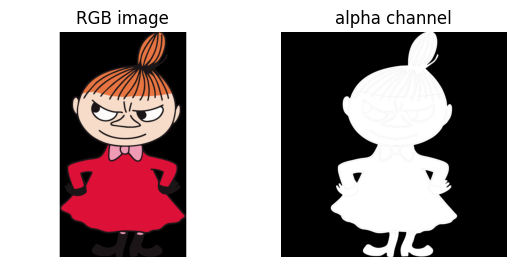

In [ ]:
im = cv2.imread("images/Little-My.png",cv2.IMREAD_UNCHANGED)
test = cv2.imread("images/Cat.jpg")
BGR_im = im[:,:,:3]
alpha_im = im[:,:,3]

plt.subplot(121);plt.imshow(BGR_im[:,:,::-1]);plt.title("RGB image");plt.axis('off')
plt.subplot(122);plt.imshow(alpha_im,cmap='gray');plt.title("alpha channel");plt.axis('off')
print(f"¯\_( ͡° ͜ʖ ͡°)_/¯this image with png format has 4 channels (height,width,4 channels) : {im.shape}")

## Bitwise Operations
In image processing, bitwise operations are used to manipulate pixel values at the binary level.
- AND : <code>cv2.bitwise_and(A, B)</code>
- OR  : <code>cv2.bitwise_or(A, B)</code>
- XOR : <code>cv2.bitwise_xor(A, B)</code>
- NOT : <code>cv2.bitwise_not(A)</code>

***!A and B shape should be the same*** (A.shape == B.shape)

(np.float64(-0.5), np.float64(799.5), np.float64(799.5), np.float64(-0.5))

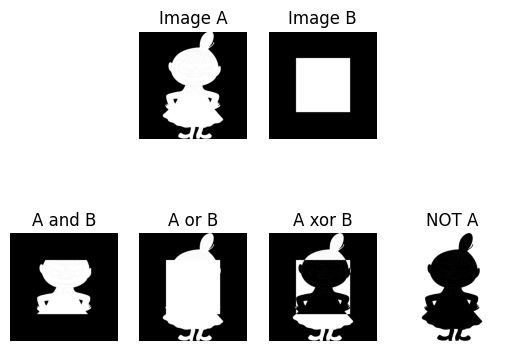

In [39]:
# A
im = cv2.imread("images/Little-My.png",cv2.IMREAD_UNCHANGED)
A = im[:,:,3]
# B
B = np.zeros((800,800),np.uint8)
cv2.rectangle(B,(200,200),(600,600),255,-1)

plt.subplot(242);plt.imshow(A,cmap='gray');plt.title("Image A");plt.axis('off')
plt.subplot(243);plt.imshow(B,cmap='gray');plt.title("Image B");plt.axis('off')
plt.subplot(245);plt.imshow(cv2.bitwise_and(A,B),cmap='gray');plt.title("A and B");plt.axis('off')
plt.subplot(246);plt.imshow(cv2.bitwise_or(A,B),cmap='gray');plt.title("A or B");plt.axis('off')
plt.subplot(247);plt.imshow(cv2.bitwise_xor(A,B),cmap='gray');plt.title("A xor B");plt.axis('off')
plt.subplot(248);plt.imshow(cv2.bitwise_not(A),cmap='gray');plt.title("NOT A");plt.axis('off')

## Create transparent PNG image

True

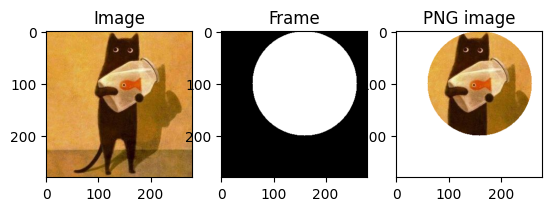

In [ ]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)
im = im[50:330] # crop image to 280*280

png_im = np.zeros((280,280,4),np.uint8)
png_im[:,:,:3] = im 
frame = np.zeros((280,280),np.uint8)
cv2.circle(frame,(160,100),100,(255,255,255),-1)
png_im[:,:,3]  = frame

plt.subplot(131);plt.imshow(im);plt.title("Image")
plt.subplot(132);plt.imshow(frame,cmap='gray');plt.title("Frame")
plt.subplot(133);plt.imshow(png_im);plt.title("PNG image")

# cv2.imwrite("Cat-png.png",cv2.cvtColor(png_im,cv2.COLOR_BGRA2RGBA))

## Draw line
<code>cv2.line(img, starting point, ending point, color, thickness)</code>
 - Example : </code>cv2.line(img, (50,50), (200,50), (0,255,0), 3)</code>

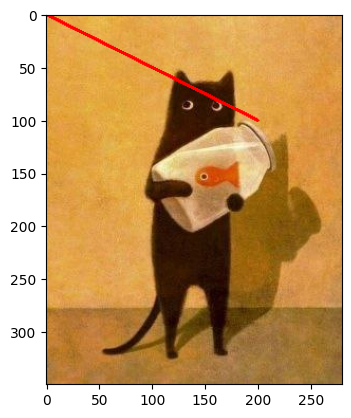

In [10]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)
# Line
cv2.line(im,(0,0),(200,100),(255,0,0),2)
plt.imshow(im)

## Draw rectangle
<code>cv2.rectangle(img, starting vertex, opposite vertex, color, thickness)</code><br>
<code>thickness = -1</code> fills the shape.
- Example : <code>cv2.rectangle(img, (60,60), (180,180), (255,0,0), 2)</code>

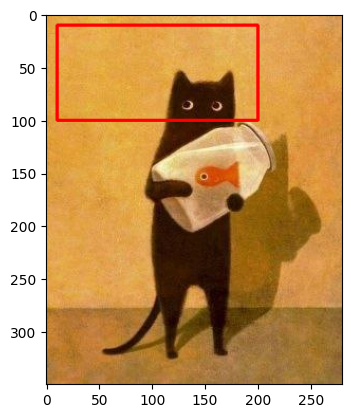

In [12]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)
# Rectangle
cv2.rectangle(im,(10,10),(200,100),(255,0,0),2)
plt.imshow(im)

## Draw circle
<code>cv2.circle(img, center, radius, color, thickness)</code><br>
<code>thickness = -1</code> fills the shape.
- Example : <code>cv2.circle(img, (120,120), 50, (0,0,255), -1)</code>

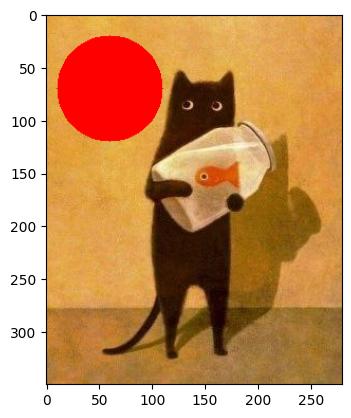

In [25]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)
# Circle
cv2.circle(im,(60,70),50,(255, 0, 0),-1)
plt.imshow(im)

## Draw ellipse
<code>cv2.ellipse(img, center, axes, angle, startAngle, endAngle, color, thickness)</code><br>
<code>thickness = -1</code> fills the shape.
- Example : <code>cv2.ellipse(img, (150,150), (80,40), 30, 0, 360, (255,255,0), 2)</code>

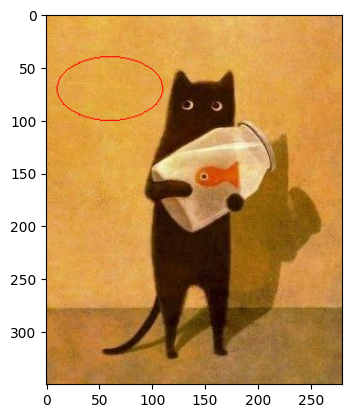

In [37]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)
# Ellipse
cv2.ellipse(im,(60,70),(50,30),0,0,360,(255, 0, 0),1)
plt.imshow(im)

## Draw polyline
<code>cv2.polylines(img, [pts], isClosed, color, thickness)</code><br>
<code>pts</code> → array of points [[x1,y1],[x2,y2],...].<br>
<code>isClosed = True</code> to connect last point to first (polygon), otherwise <code>False</code>.
- Example :<br> <code>pts = np.array([[50,50],[200,50],[170,150],[80,150]], np.int32)</code><br>
                  <code>pts = pts.reshape((-1,1,2))</code> OpenCV’s cv2.polylines() expects the points in a very specific shape<br> 
                  <code>cv2.polylines(img, [pts], True, (0,255,255), 2)</code><br>

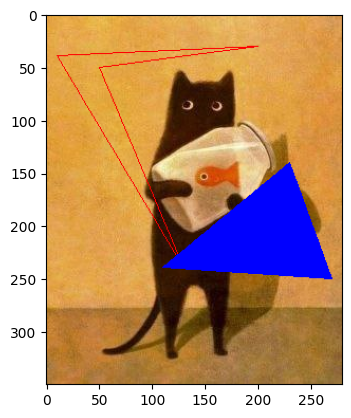

In [57]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)
# Red Polylines
pts = np.array([[50,50],[130,240],[10,39],[200,30]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(im,[pts],True,(255,0,0),1)

# Blue Filled Polygons
pts1 = np.array([[270,250],[230,140],[110,239]], np.int32)
pts1 = pts1.reshape((-1,1,2))
cv2.fillPoly(im, [pts1], (0,0,255))


plt.imshow(im)

## Write text
<code>cv2.putText(img, text, (x, y), font, fontScale, color, thickness, lineType)</code><br>
- Example : <code>cv2.putText(img, "Text", (50,250),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)</code>

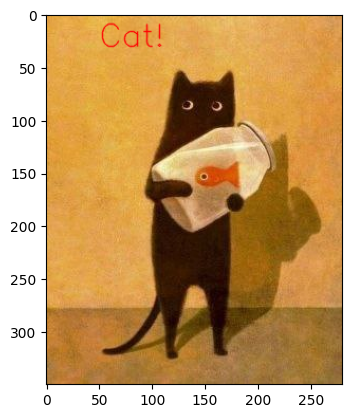

In [67]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)

cv2.putText(im,"Cat!",(50,30),cv2.FONT_ITALIC,1,(255,0,0),1,cv2.LINE_AA)
plt.imshow(im)

## Arithmetic operations
***cv2.add()***
- Performs pixel-wise addition of two images (or an image and a scalar).
- Iit uses saturation arithmetic. if the sum exceeds 255, the value is capped at 255 (no overflow).
- Example: <code>brighter = cv2.add(img, 50)   # adds 50 to all pixel values</code>

***cv2.subtract()***
- Performs pixel-wise subtraction.
- Also uses saturation arithmetic. if the result goes below 0, it is set to 0 (no underflow).
- Example: <code>darker = cv2.subtract(img, 50)   # subtracts 50 from all pixels</code>

***cv2.addWeighted()***
- Blends two images together using a weighted sum.
- Formula: $$\alpha.img1+\beta.img2+\gamma$$
- α and β : weights for each image (control transparency).
- γ : scalar added to the result (brightness adjustment).
- Example : <code>blended = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)</code>

(np.float64(-0.5), np.float64(279.5), np.float64(349.5), np.float64(-0.5))

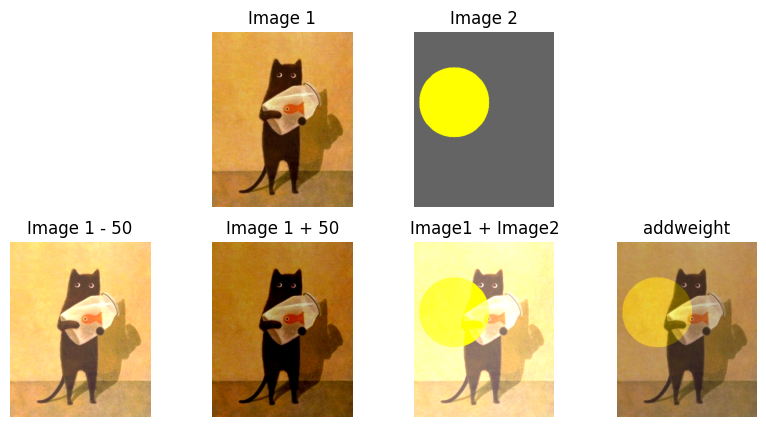

In [21]:
img1 = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)
img2 = np.ones(im.shape,dtype='uint8')*100
cv2.circle(img2,(80,140),70,(255,255,0),-1)

# add
brighter = cv2.add(img1, 50)
# add
added = cv2.add(img1,img2)
# subtract
darker = cv2.subtract(img1, 50)
# addweighted
blended = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)

plt.figure(figsize=[10,5])
plt.subplot(242);plt.imshow(img1);plt.title("Image 1");plt.axis('off')
plt.subplot(243);plt.imshow(img2);plt.title("Image 2");plt.axis('off')
plt.subplot(245);plt.imshow(brighter);plt.title("Image 1 - 50");plt.axis('off')
plt.subplot(246);plt.imshow(darker);plt.title("Image 1 + 50");plt.axis('off')
plt.subplot(247);plt.imshow(added);plt.title("Image1 + Image2");plt.axis('off')
plt.subplot(248);plt.imshow(blended);plt.title("addweight");plt.axis('off')


## Brightness and Contrast (linear)
An image can be represented as a matrix where each element corresponds to the intensity value of a pixel (for grayscale) or a vector of values (for color channels). Adjusting brightness and contrast can be described using a linear transformation applied to each pixel.<br>
The general formula is: $$new Value=α⋅Value+β$$
- α : contrast factor (scale)
    - α>1: differences between light and dark regions are amplified → image looks sharper.
    - 0<α<1: differences are reduced → image looks flatter and duller
- β : brightness offset (shift)
    - This shifts all pixel values up or down equally.
    - The image becomes lighter or darker, but the difference between pixel values (contrast) remains the same.

OpenCV provides a built-in function that applies this transformation safely with saturation arithmetic:<br>
<code>cv2.convertScaleAbs(image, alpha, beta)</code>

(np.float64(-0.5), np.float64(279.5), np.float64(349.5), np.float64(-0.5))

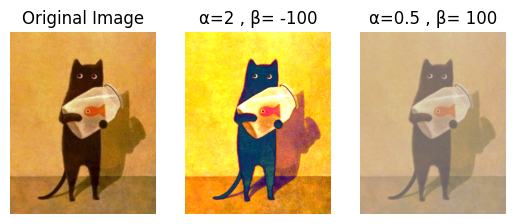

In [12]:
img = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)

im1 = cv2.convertScaleAbs(img,alpha= 2,beta= -100)
im2 = cv2.convertScaleAbs(img,alpha= 0.5,beta= 100)

plt.subplot(131);plt.imshow(img);plt.title("Original Image");plt.axis('off')
plt.subplot(132);plt.imshow(im1);plt.title("α=2 , β= -100");plt.axis('off')
plt.subplot(133);plt.imshow(im2);plt.title("α=0.5 , β= 100");plt.axis('off')



## Histogram
A histogram is a graphical representation of the distribution of pixel intensity values in an image. It shows how many pixels fall into each possible intensity level. It is a powerful tool for understanding image characteristics and for guiding image processing tasks like contrast adjustment, segmentation, and enhancement.<br>
The <code>plt.hist()</code> function is used to plot a histogram in Python with Matplotlib. It takes a sequence of data (such as pixel intensities from an image) and divides it into intervals called bins, then counts how many values fall into each bin. The result is displayed as a bar plot.

<code>plt.hist(data, bins=256, range=(0,256), color='gray')</code>
- <code>data</code> : input values (e.g., pixel intensities, often flattened using <code>.ravel()</code>).
- <code>bins</code> : number of intervals to divide the data into.
- <code>range</code> : the minimum and maximum values considered.
- <code>color</code> : bar color.


C:\Users\LCPart\AppData\Local\Temp\ipykernel_14448\3968672746.py:7: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.subplot(221);plt.hist(grey_im.ravel(),256,(0,256));plt.title("Greyscale Histogram")
C:\Users\LCPart\AppData\Local\Temp\ipykernel_14448\3968672746.py:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.subplot(223);plt.hist(im1.ravel(),256,(0,256));plt.title("α=2 , β= -100 Histogram")
C:\Users\LCPart\AppData\Local\Temp\ipykernel_14448\3968672746.py:9: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.subplot(224);plt.hist(im2.ravel(),256,(0,256));plt.title("α=0.5 , β= 100 Histogram")


Text(0.5, 1.0, 'α=0.5 , β= 100 Histogram')

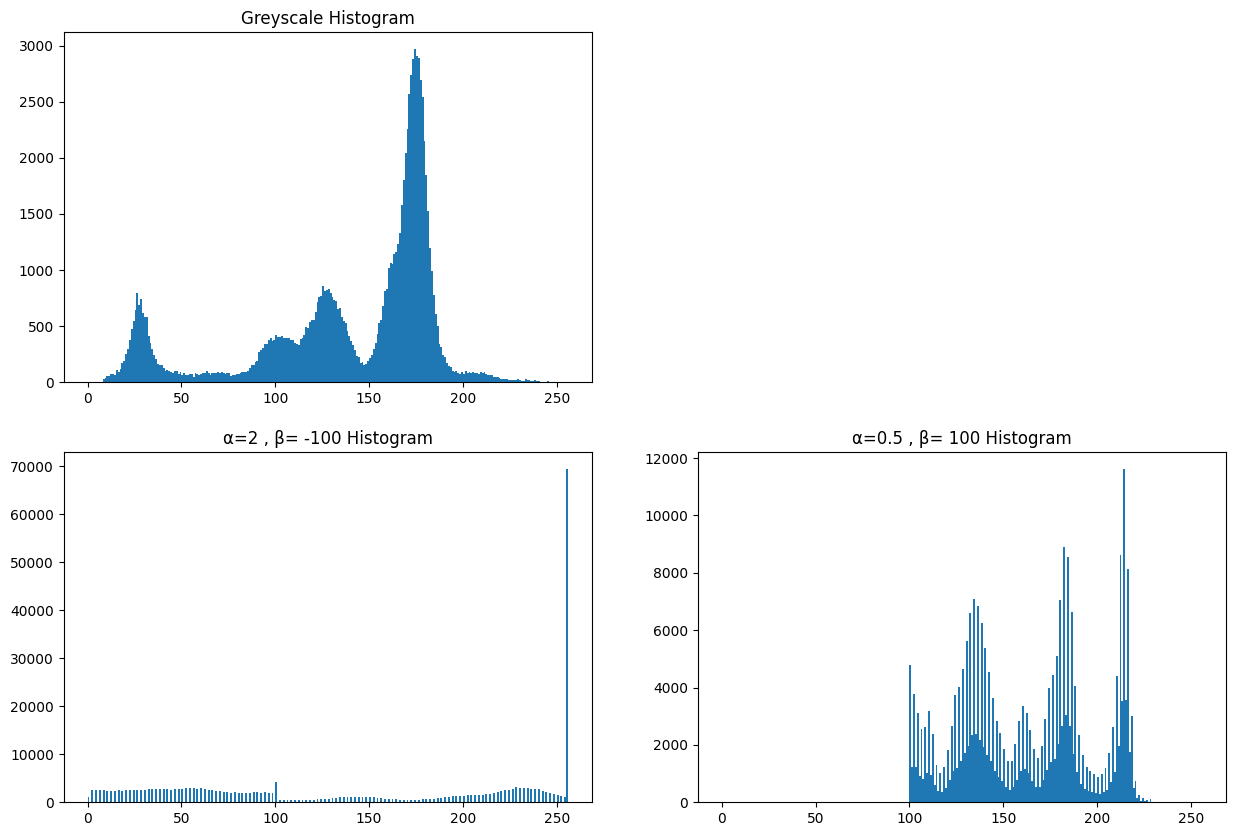

In [15]:
im = cv2.imread("images/Cat.jpg")

grey_im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
B,G,R = cv2.split(im)

plt.figure(figsize=[15,10])
plt.subplot(221);plt.hist(grey_im.ravel(),256,(0,256));plt.title("Greyscale Histogram")
plt.subplot(223);plt.hist(im1.ravel(),256,(0,256));plt.title("α=2 , β= -100 Histogram")
plt.subplot(224);plt.hist(im2.ravel(),256,(0,256));plt.title("α=0.5 , β= 100 Histogram")

## Gamma correction (non linear)
As observed in the histograms, when contrast is increased (α>1) using linear intensity scaling, a significant portion of image information can be lost due to saturation and clipping at the lower and upper intensity boundaries (0 and 255 for 8-bit images). This results in loss of detail in dark or bright regions.

To address this limitation, gamma correction is employed. Gamma correction applies a non-linear transformation to pixel intensities, expressed as:
$$NewValue = 255\times\left(\frac{Value}{255}\right)^{\gamma}$$
γ is the gamma value controlling the transformation.
- When γ<1: darker regions are brightened, improving visibility of shadow details.
- When γ>1: brighter regions are suppressed, enhancing details in highlights.

(np.float64(-0.5), np.float64(279.5), np.float64(349.5), np.float64(-0.5))

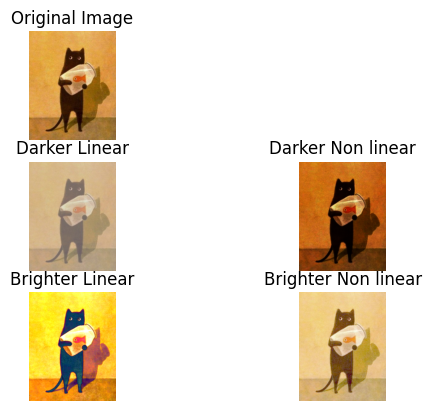

In [18]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)

def gamma_correction(image, gamma=1.0):
    # build a lookup table for efficiency
    table = np.array([( (i / 255.0) ** gamma ) * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(image, table)

brighter_linear = cv2.convertScaleAbs(img,alpha= 2,beta= -100)
darker_linear = cv2.convertScaleAbs(img,alpha= 0.5,beta= 100)

brighter_non_linear = gamma_correction(im,gamma=0.5)
darker_non_linear = gamma_correction(im,gamma=2)

plt.subplot(321);plt.imshow(im);plt.title("Original Image");plt.axis('off')
plt.subplot(323);plt.imshow(darker_linear);plt.title("Darker Linear");plt.axis('off')
plt.subplot(324);plt.imshow(darker_non_linear);plt.title("Darker Non linear");plt.axis('off')
plt.subplot(325);plt.imshow(brighter_linear);plt.title("Brighter Linear");plt.axis('off')
plt.subplot(326);plt.imshow(brighter_non_linear);plt.title("Brighter Non linear");plt.axis('off')

## Events in OpenCV
In OpenCV, events allow us to interact with windows using input devices such as the mouse or keyboard. Examples of events include pressing a key, moving the mouse, or clicking on a window. This makes it possible to create interactive applications like drawing tools, annotation software, or object selection systems.


## Mouse Events
Mouse events are handled using the function:<br>

<code>cv2.setMouseCallback(window_name, callback_function)</code>
- <code>window_name</code>: name of the window where the event will be captured.
- <code>callback_function</code>: a function that is executed whenever a mouse event occurs.

**Common Mouse Events**
Some commonly used event flags are:

- <code>cv2.EVENT_LBUTTONDOWN</code> → Left mouse button pressed
- <code>cv2.EVENT_RBUTTONDOWN</code> → Right mouse button pressed
- <code>cv2.EVENT_MBUTTONDOWN</code> → Middle mouse button pressed
- <code>cv2.EVENT_MOUSEMOVE</code> → Mouse moved
- <code>cv2.EVENT_LBUTTONUP</code> → Left button released


Text(0.5, 1.0, 'Results')

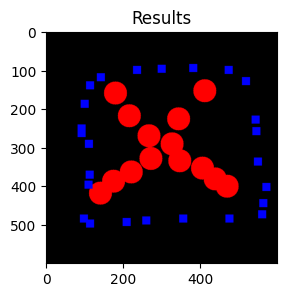

In [14]:
img = np.zeros((600,600,3),np.uint8)

def draw(event,x,y,flags,params):
    if event == cv2.EVENT_LBUTTONDOWN: # Left mouse button pressed
        cv2.circle(img,(x,y),30,(255,0,0),-1)
    elif event == cv2.EVENT_RBUTTONDOWN: # Right mouse button pressed
        cv2.rectangle(img,(x,y),(x+20,y+20),(0,0,255),-1)

cv2.namedWindow('image')
cv2.setMouseCallback('image',draw)


while True:
    cv2.imshow('image',img)
    if cv2.waitKey(1) & 0xFF == 27: # Esc key for closing the window
        break

cv2.destroyAllWindows()

# plot result
plt.figure(figsize=[3,3])
plt.imshow(img);plt.title("Results")

### Brush usuing circles

Text(0.5, 1.0, 'Results')

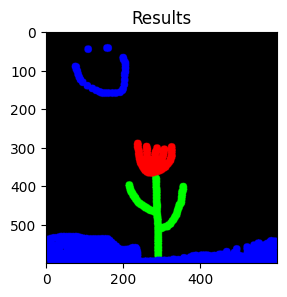

In [19]:
img = np.zeros((600,600,3),np.uint8)

is_drawing = False
color = (255,0,255)
def brush(event,x,y,flag,param):
    global is_drawing,color
    if event == cv2.EVENT_LBUTTONDOWN:
        is_drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if is_drawing:
            cv2.circle(img,(x,y),10,color,-1)
    elif event == cv2.EVENT_LBUTTONUP:
        is_drawing = False

cv2.namedWindow('image')
cv2.setMouseCallback('image',brush)


while True:
    cv2.imshow('image',img)
    key = cv2.waitKey(1) & 0xFF
    if key == 27: # Esc key for closing the window
        break
    elif key == ord('b'):
        color = (255,0,0)
    elif key == ord('g'):
        color = (0,255,0)
    elif key == ord('r'):
        color = (0,0,255)

cv2.destroyAllWindows()

# plot result
plt.figure(figsize=[3,3])
plt.imshow(img[:,:,::-1]);plt.title("Results")

### Brush using lines

Text(0.5, 1.0, 'Results')

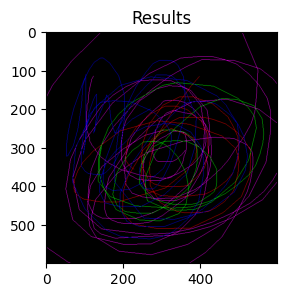

In [ ]:
img = np.zeros((600,600,3),np.uint8)

is_drawing = False
color = (255,0,255)
xi = 0
yi = 0

def brush(event,x,y,flag,param):
    global is_drawing,color,xi,yi
    if event == cv2.EVENT_LBUTTONDOWN:
        is_drawing = True
        xi,yi = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if is_drawing:
            cv2.line(img,(xi,yi),(x,y),color,1)
            xi,yi = x,y
    elif event == cv2.EVENT_LBUTTONUP:
        is_drawing = False

cv2.namedWindow('image')
cv2.setMouseCallback('image',brush)


while True:
    cv2.imshow('image',img)
    key = cv2.waitKey(1) & 0xFF
    if key == 27: # Esc key for closing the window
        break
    elif key == ord('b'):
        color = (255,0,0)
    elif key == ord('g'):
        color = (0,255,0)
    elif key == ord('r'):
        color = (0,0,255)

cv2.destroyAllWindows()

# plot result
plt.figure(figsize=[3,3])
plt.imshow(img[:,:,::-1]);plt.title("Results")

## Annotation
Annotation is a fundamental task in computer vision, often used for marking regions of interest (<code>ROIs</code>), bounding boxes, or training datasets. OpenCV provides interactive tools to annotate images using the mouse.

In this example, rectangles are drawn with mouse clicks, and their coordinates are recorded for later use.

[[(105, 47), (187, 107)], [(133, 125), (198, 186)]]


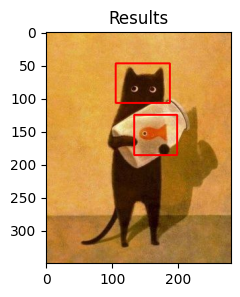

In [24]:
img = cv2.imread("images/Cat.jpg")
reset_img = img.copy()
temp_img = img.copy()

is_drawing = False
start = (0,0)
points = []

def rectangle(event,x,y,flag,param):
    global is_drawing,start,points

    if event == cv2.EVENT_LBUTTONDOWN:
        start = (x,y)
        is_drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if is_drawing:
            temp_img = img.copy()
            cv2.rectangle(temp_img,start,(x,y),(0,0,255),2)
            cv2.imshow('image',temp_img)
    elif event == cv2.EVENT_LBUTTONUP:
        # record end points
        points.append([start,(x,y)])
        # draw
        cv2.rectangle(img,start,(x,y),(0,0,255),2)
        cv2.imshow('image',img)
        is_drawing = False

cv2.namedWindow('image')
cv2.setMouseCallback('image',rectangle)


while True:
    if not is_drawing:
        cv2.imshow('image',img)
    key = cv2.waitKey(1) & 0xFF
    if key == 27: # Esc key for closing the window
        break
    elif key == ord('r'): # Reset
        img = reset_img
        points = []
    elif key == ord('z'): # Undo
        img = reset_img.copy()
        points.pop()
        for p in points:
            cv2.rectangle(img,p[0],p[1],(0,0,255),2)

cv2.destroyAllWindows()

# plot result
plt.figure(figsize=[3,3])
plt.imshow(img[:,:,::-1]);plt.title("Results")
print(points)

## Trackbar
A trackbar is a GUI element (slider) that lets the user change a variable’s value interactively while an OpenCV window is open.

create a trackbar: <code>cv2.createTrackbar(trackbar_name, window_name, min_value, max_value, on_change_callback)</code>

current position of the slider : <code>cv2.getTrackbarPos(trackbar_name, window_name)</code>

Text(0.5, 1.0, 'Results')

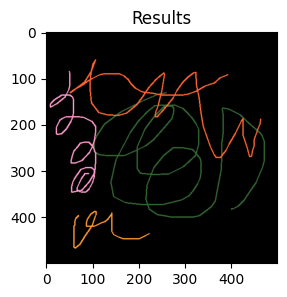

In [8]:
img = np.zeros((500,500,3),np.uint8)
reset_img = img.copy()

thickness = 0
is_drawing = False
color = (0,233,0)
start_point = (0,0)

def nothing(x):
    pass

def brush(event,x,y,flag,param):
    global is_drawing,color,start_point
    if event == cv2.EVENT_LBUTTONDOWN:
        is_drawing = True
        start_point = (x,y)
    elif event == cv2.EVENT_MOUSEMOVE:
        if is_drawing:
            cv2.line(img,start_point,(x,y),color,thickness)
            start_point = (x,y)
    elif event == cv2.EVENT_LBUTTONUP:
        is_drawing = False

cv2.namedWindow('image')

cv2.createTrackbar('Blue','image',0,255,nothing)
cv2.createTrackbar('Green','image',0,255,nothing)
cv2.createTrackbar('Red','image',0,255,nothing)
cv2.createTrackbar('Brush size','image',0,5,nothing)

cv2.setMouseCallback('image',brush)


while True:
    cv2.imshow('image',img)
    key = cv2.waitKey(1) & 0xFF
    if key == 27: # Esc key for closing the window
        break
    elif key == ord('r'): # Reset
        img = reset_img
    B = cv2.getTrackbarPos('Blue','image')
    G = cv2.getTrackbarPos('Green','image')
    R = cv2.getTrackbarPos('Red','image')
    size = cv2.getTrackbarPos('Brush size','image')
    color = (B,G,R)
    thickness = size

cv2.destroyAllWindows()

# plot result
plt.figure(figsize=[3,3])
plt.imshow(img[:,:,::-1]);plt.title("Results")


## Webcam
OpenCV allows direct access to a webcam (or any video capture device) using the cv2.VideoCapture() class. Each frame from the webcam can be read in a loop, processed (e.g., grayscale conversion, edge detection), and displayed in real time.

- 1-Initialize webcam: <code></code> 
    - <code>cap = cv2.VideoCapture(0)</code>
    - 0 → default webcam.
    - 1, 2, ... → additional cameras if multiple are connected.
- 2-Read frames:
    - Use <code>ret, frame = cap.read()</code> inside a loop.
    - <code>ret</code> is a boolean indicating success, <code>frame</code> is the captured image.
- 3-Process/display frames:
    - Frames can be converted, filtered, or used in detection algorithms.
    - Display with <code>cv2.imshow()</code>.
- 4-Exit loop: 
    - Use <code>cv2.waitKey()</code> to listen for key presses (e.g., ESC to quit).
- 5-Release resources:
    - Always call <code>cap.release()</code> and <code>cv2.destroyAllWindows()</code> after finishing.


In [ ]:
webcam = cv2.VideoCapture(0)

while True:
    _,frame = webcam.read()
    cv2.imshow('webcam',frame)
    key = cv2.waitKey(1) & 0xFF
    if key == 27: # Esc key for closing the window
        break

webcam.release()
cv2.destroyAllWindows()

frame.shape

(480, 640, 3)

## Online Stream
cv2.VideoCapture() can open any video stream source:
- RTSP / HTTP streams (CCTV, IP cameras, online streams)
- Some online video URLs (depending on codec/format and FFmpeg support)

I found this url from this [GitHub repository](https://github.com/fury999io/public-ip-cams?tab=readme-ov-file)

In [14]:
url = "http://213.3.30.80:6001/axis-cgi/mjpg/video.cgi"
stream = cv2.VideoCapture(url)

while True:
    _,frame = stream.read()
    cv2.imshow('stream',frame)
    key = cv2.waitKey(1) & 0xFF
    if key == 27: # Esc key for closing the window
        break

stream.release()
cv2.destroyAllWindows()

## Screenrecord
OpenCV can also be used for screen recording by capturing the desktop frames and saving them as a video. While OpenCV cannot directly capture the screen, it can record frames obtained from libraries like PyAutoGUI or mss.

- Capture the screen → using a library like <code>mss</code>(faster) or <code>PyAutoGUI</code>.
- Convert the captured frame → to a NumPy array compatible with OpenCV.
- Save frames to video → using <code>cv2.VideoWriter</code>.

In [ ]:
!pip install mss

In [15]:
import cv2
import numpy as np
import mss

# Define screen capture dimensions (full screen or region)
monitor = {"top": 0, "left": 0, "width": 800, "height": 600}

# Define VideoWriter
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter("screen_record.avi", fourcc, 20.0, (monitor["width"], monitor["height"]))

with mss.mss() as sct:
    while True:
        # Capture screen
        img = np.array(sct.grab(monitor))

        # Convert BGRA to BGR
        frame = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

        # Write to video
        out.write(frame)

        # Display live preview
        cv2.imshow("Screen Recording", frame)

        if cv2.waitKey(1) & 0xFF == 27:  # ESC to exit
            break

out.release()
cv2.destroyAllWindows()


## Video File
OpenCV uses the <code>cv2.VideoCapture()</code> class not only for webcams but also for reading video files. Each frame can be processed in a loop and displayed sequentially, giving the effect of video playback.

- 1-Initialize: <code></code> 
    - <code>videofile = cv2.VideoCapture("file path")</code>
- 2-Read frames:
    - Use <code>ret, frame = cap.read()</code> inside a loop.
    - <code>ret = False</code> means the video has ended or cannot be read., <code>frame</code> is the captured frame.
- 3-Process/display frames:
    - Frames can be converted, filtered, or used in detection algorithms.
    - Display with <code>cv2.imshow()</code>.
- 4-Exit loop: 
    - <code>cv2.waitKey(delay)</code> controls playback speed — the delay (in ms) is usually set according to the video’s FPS.
    - Break if video ended <code>ret = False</code>
    - Use <code>cv2.waitKey()</code> to listen for key presses (e.g., ESC to quit).
- 5-Release resources:
    - Always call <code>cap.release()</code> and <code>cv2.destroyAllWindows()</code> after finishing.


In [ ]:
videofile = cv2.VideoCapture("videos\little-my.mp4")
print(f'Height : {videofile.get(cv2.CAP_PROP_FRAME_HEIGHT)}')
print(f'Width : {videofile.get(cv2.CAP_PROP_FRAME_WIDTH)}')
print(f'FPS : {videofile.get(cv2.CAP_PROP_FPS)}')

fps = videofile.get(cv2.CAP_PROP_FPS)
# Control playback speed to match the real FPS
delay = int(1000 / fps)

while True:
    ret,frame = videofile.read()
    if not ret :
        break
    
    cv2.imshow('webcam',frame)
    key = cv2.waitKey(delay) & 0xFF
    if key == 27 : # Esc key for closing the window
        break

videofile.release()
cv2.destroyAllWindows()


Height : 166.0
Width : 166.0
FPS : 16.0


## Saving Videos
To write frames (to a new file) OpenCV uses <code>cv2.VideoWriter</code>.

<code>cv2.VideoWriter(filename, fourcc, fps, frame_size)</code> : <code></code>
- <code>filename</code> → name of the output file (e.g., "output.avi").
- <code>fourcc</code> → codec used to compress the video. common codecs:
    - <code>cv2.VideoWriter_fourcc(*'XVID')</code> for <code>.avi</code>
    - <code>cv2.VideoWriter_fourcc(*'mp4v')</code> for <code>.mp4</code>
- <code>fps</code> → frames per second (should match input for smooth playback).
- <code>frame_size</code> → (width, height) of the video frames. Must **exactly** match the size of the frames being written.

After creating the writer, you call <code>writer.write(frame)</code> for each frame you want to save. Finally, call <code>writer.release()</code> when done.


### Save from Webcam

In [ ]:
webcam = cv2.VideoCapture(0)

width  = int(webcam.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(webcam.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
# Create writer
webcam_output = cv2.VideoWriter("webcam_output.avi", fourcc, fps, (width, height))

while True:
    # Read
    ret,frame = webcam.read()
    if not ret :
        break

    # Save
    webcam_output.write(frame)

    # Display webcam
    cv2.imshow('webcam',frame)

    key = cv2.waitKey(delay) & 0xFF
    if key == 27 : # Esc key for closing the window
        break

webcam.release()
webcam_output.release()
cv2.destroyAllWindows()


### Save from File
and convert videofile to grayscale

In [ ]:
cap = cv2.VideoCapture("videos/snufkin.mp4")

width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
video_output = cv2.VideoWriter("grayscale_output.avi", fourcc, fps, (width, height),isColor=False) # isColor=False because output is grayscale

while True:
    # Read
    ret,frame = cap.read()
    if not ret :
        break

    # Convert frame to GRAY
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    # Write
    video_output.write(frame)

    # Display grayscale video
    cv2.imshow('grayscale video',frame)
    key = cv2.waitKey(int(1000/fps)) & 0xFF
    if key == 27 : # Esc key for closing the window
        break

cap.release()
video_output.release()
cv2.destroyAllWindows()

## Binary Processing
Binary processing is one of the most fundamental concepts in image processing. It refers to converting an image into a binary image, where each pixel can take only two possible values:
- 0 (black) → represents background.
- 255 (white) → represents foreground (the object of interest).

Advantages of Binary Processing?
- Simplicity → Reduces image complexity, making analysis faster.
- Segmentation → Helps separate objects from the background.
- Preprocessing → Essential step before applying operations like contour detection, shape analysis, and object counting.

## Thresholding
Thresholding is a technique in image processing where we convert a grayscale image into a binary image. This is done by setting a threshold value(T) :

- If a pixel intensity is greater than T, it is set to the maximum value (usually 255, white).
- Otherwise, it is set to the minimum value (0, black).

<code>ret, binary_img = cv2.threshold(input_img, thresh, maxval, type)</code>
- <code>input_img</code> → input image (**must be grayscale**).
- <code>thresh</code> → threshold value T.
- <code>maxval</code> → value assigned if condition is met (usually 255).
- <code>type</code> → thresholding type.

Types of Thresholding:
- <code>cv2.THRESH_BINARY</code>
    - Pixel > T → maxval
    - Pixel ≤ T → 0
- <code>cv2.THRESH_BINARY_INV</code>
    - Inverse of binary.
- <code>cv2.THRESH_TRUNC</code>
    - Pixel > T → T
    - Pixel ≤ T → unchanged
- <code>cv2.THRESH_TOZERO</code>
    - Pixel > T → unchanged
    - Pixel ≤ T → 0
- <code>cv2.THRESH_TOZERO_INV</code>
    - Inverse of ToZero.
    


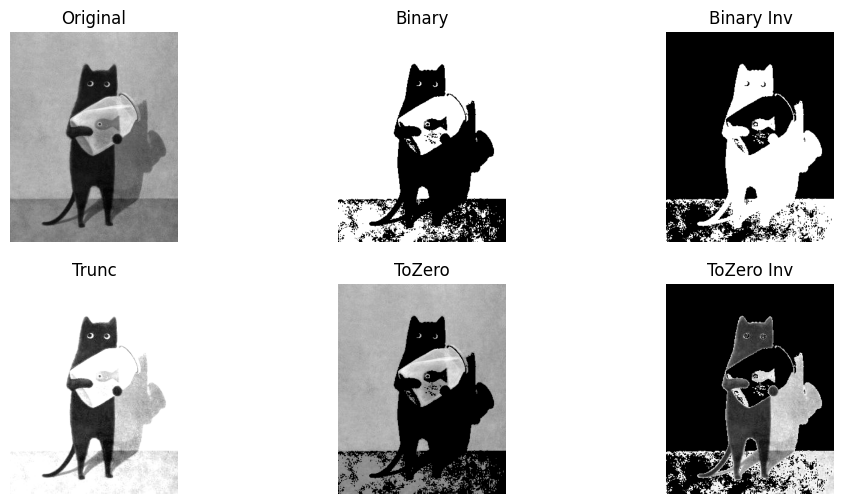

In [2]:
img = cv2.imread("images/Cat.jpg", cv2.IMREAD_GRAYSCALE)

# Apply different thresholding types
_, th_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, th_binary_inv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, th_trunc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, th_tozero = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, th_tozero_inv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

# Plot results
titles = ["Original", "Binary", "Binary Inv", "Trunc", "ToZero", "ToZero Inv"]
images = [img, th_binary, th_binary_inv, th_trunc, th_tozero, th_tozero_inv]

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

## Otsu’s Thresholding
In standard thresholding, we manually pick a threshold value T. But what if the image has complex intensity distributions or we don’t know the best value?
This is where Otsu’s method comes in.

- Otsu’s algorithm automatically calculates the optimal threshold value from the image histogram.

- It works by minimizing the intra-class variance (spread within background and foreground) or equivalently maximizing the inter-class variance (separation between background and foreground).

Mathematically, it evaluates all possible thresholds and selects the one that best separates the two classes (foreground & background).
Otsu’s Thresholding is useful when lighting is uneven, and manual threshold selection is difficult.

**Otsu’s Method works well when the image histogram is bimodal (two peaks: foreground and background).**

<code>ret, otsu_img = cv2.threshold(input_img, thresh, maxval, cv2.THRESH_BINARY + cv2.THRESH_OTSU)</code>

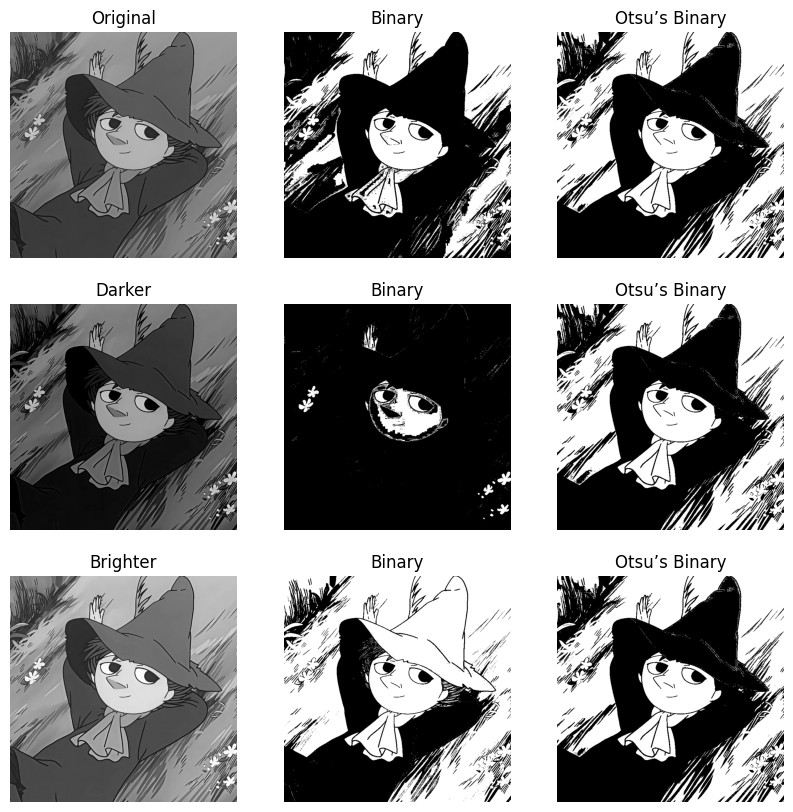

In [23]:
img = cv2.imread("images/Snufkin.jpg",cv2.IMREAD_GRAYSCALE)
darker_img = cv2.add(img.copy(),-50)
brighter_img = cv2.add(img.copy(),50)

_,img_th = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
_,img_otsu = cv2.threshold(img,127,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

_,dimg_th = cv2.threshold(darker_img,127,255,cv2.THRESH_BINARY)
_,dimg_otsu = cv2.threshold(darker_img,127,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

_,bimg_th = cv2.threshold(brighter_img,127,255,cv2.THRESH_BINARY)
_,bimg_otsu = cv2.threshold(brighter_img,127,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

titles = ["Original","Binary","Otsu’s Binary","Darker","Binary","Otsu’s Binary","Brighter","Binary","Otsu’s Binary"]
images = [img, img_th, img_otsu, darker_img, dimg_th, dimg_otsu, brighter_img, bimg_th,bimg_otsu]

plt.figure(figsize=[10,10])
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(titles[i])
    plt.axis("off")


## Adaptive Thresholding
Unlike global thresholding (including Otsu), where one single threshold value is used for the entire image, adaptive thresholding calculates a different threshold for each pixel based on the intensities of its local neighborhood.

This is especially useful when the image has:
- Non-uniform lighting
- Shadows or gradients
- Different brightness regions

Otsu’s Method works well when the image histogram is bimodal. But **when illumination changes across the image**, a single global threshold is not sufficient.
Adaptive Thresholding overcomes this by **computing thresholds locally**.

<code>cv2.adaptiveThreshold(img, maxValue, adaptiveMethod, thresholdType, blockSize, C)</code>
- <code>adaptiveMethod</code> → How the threshold value is calculated for each neighborhood:
    - <code>cv2.ADAPTIVE_THRESH_MEAN_C</code>: mean of the local neighborhood − constant C.
    - <code>cv2.ADAPTIVE_THRESH_GAUSSIAN_C</code>: weighted sum (Gaussian) of the local neighborhood − constant C.

- <code>thresholdType</code> → Usually <code>cv2.THRESH_BINARY</code> or <code>cv2.THRESH_BINARY_INV</code>.

- <code>blockSize</code> → Size of the local neighborhood (must be **odd**, e.g., 3, 5, 11…).

- <code>C</code> → A constant subtracted from the computed threshold (fine-tuning).

Text(0.5, 1.0, 'Adaptive Gaussian')

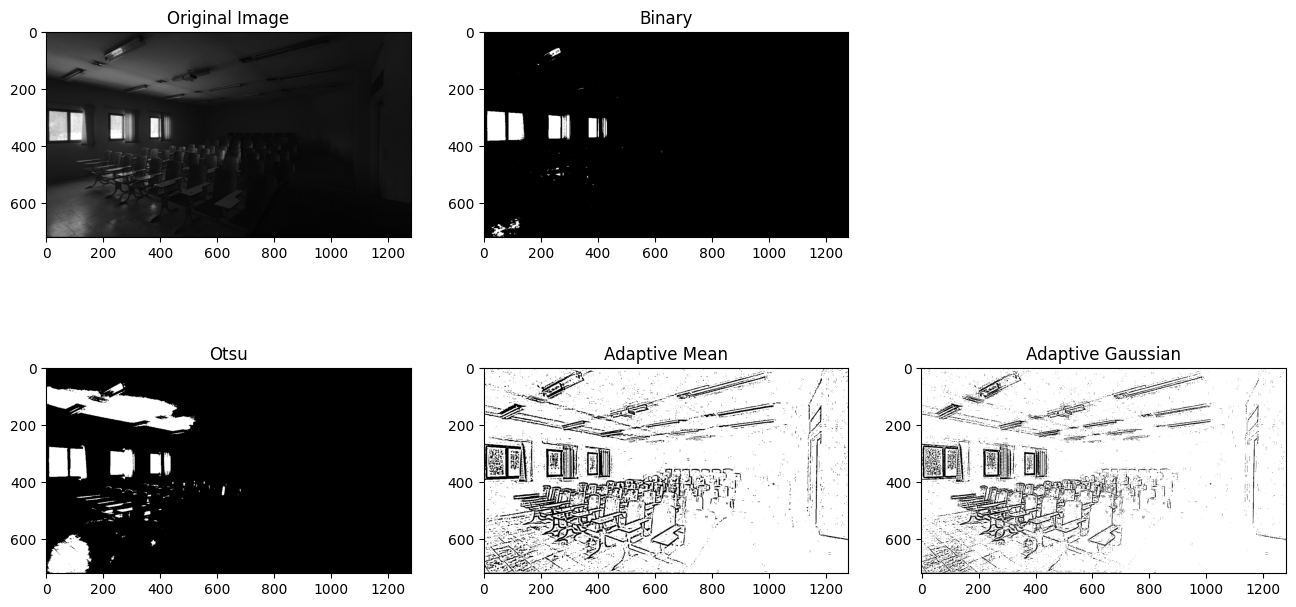

In [21]:
img = cv2.imread("images/classroom.jpg",cv2.IMREAD_GRAYSCALE)

_,th = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th_mean = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th_gaussian = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
_,img_otsu = cv2.threshold(img,127,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=[16,8])
plt.subplot(231);plt.imshow(img,cmap='gray');plt.title("Original Image")
plt.subplot(232);plt.imshow(th,cmap='gray');plt.title("Binary")
plt.subplot(234);plt.imshow(img_otsu,cmap='gray');plt.title("Otsu")
plt.subplot(235);plt.imshow(th_mean,cmap='gray');plt.title("Adaptive Mean")
plt.subplot(236);plt.imshow(th_gaussian,cmap='gray');plt.title("Adaptive Gaussian")

### Comparison:

| Method                   | Description |
|---------------------------|-------------|
| **Binary Thresholding**   | A fixed threshold value is chosen manually.<br>Simple and fast, but not effective if lighting conditions vary. |
| **Otsu’s Method**         | Automatically finds the optimal global threshold from the histogram.<br>Best for images with clear bimodal histograms.<br>Fails under varying illumination. |
| **Adaptive Thresholding** | Computes thresholds locally for each pixel based on its neighborhood.<br>Best for uneven lighting or gradients.<br>More robust in real-world scenarios (documents, scanned papers, outdoor images). |
